<a href="https://colab.research.google.com/github/anurupsatyarth/deep_learning_pytorch/blob/main/pytorch_ANN_%7C_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"device:{device}")

device:cuda


In [6]:
df =  pd.read_csv('/content/fashion-mnist_train.csv')


In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(60000, 785)

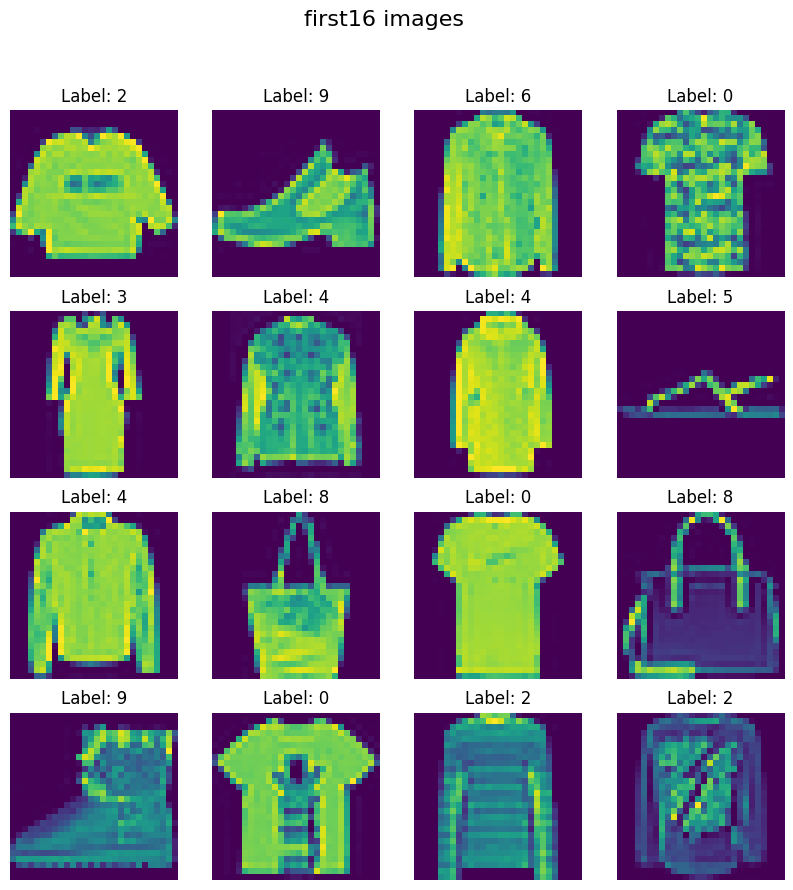

In [9]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("first16 images",fontsize=16)

for i,ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Label: {df.iloc[i,0]}')
plt.show()

In [10]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [11]:
X.shape

(60000, 784)

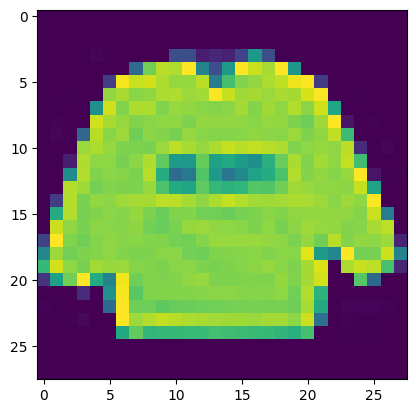

In [12]:
plt.imshow(X[0].reshape(28,28))

In [13]:
y.shape

(60000,)

In [14]:
y[0]

np.int64(2)

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape

(48000, 784)

In [17]:
X_test.shape

(12000, 784)

In [18]:
  X_train = X_train/255.0
  X_test = X_test/255.0

In [19]:
#create a custom dataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index], self.labels[index]

In [20]:
# create object of dataset
train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)

In [21]:
# create object of dataloader
train_dataloader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader =  DataLoader(test_dataset,batch_size=32,shuffle=False)

In [22]:
# define ann models
class MYANN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,x):
    return self.model(x)


In [23]:
# set parameters
epochs= 100
LR = 0.01

In [25]:
# initialize model
model_ann = MYANN(X_train.shape[1])
model_ann = model_ann.to(device)
# define loss function
criterion = nn.CrossEntropyLoss()
# define optimizer
optimizer = optim.SGD(model_ann.parameters(),lr=LR)

In [ ]:
# create training loop
for epoch in range(epochs):
  for batch_features, batch_labels in train_dataloader:

     batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

     output = model_ann(batch_features)

     loss = criterion(output,batch_labels)

     optimizer.zero_grad()

     loss.backward()

     optimizer.step()

  print(f"Epoch: {epoch+1} , loss: {loss.item()}")

Epoch: 1 , loss: 0.6824861764907837
Epoch: 2 , loss: 0.4313341975212097
Epoch: 3 , loss: 0.46943530440330505
Epoch: 4 , loss: 0.38574427366256714
Epoch: 5 , loss: 0.7498315572738647
Epoch: 6 , loss: 0.3251994550228119
Epoch: 7 , loss: 0.434752494096756
Epoch: 8 , loss: 0.357821524143219
Epoch: 9 , loss: 0.2312116026878357
Epoch: 10 , loss: 0.43312084674835205
Epoch: 11 , loss: 0.630000650882721
Epoch: 12 , loss: 0.3039344251155853
Epoch: 13 , loss: 0.46278801560401917
Epoch: 14 , loss: 0.3930661380290985
Epoch: 15 , loss: 0.18269255757331848
Epoch: 16 , loss: 0.45659178495407104
Epoch: 17 , loss: 0.40352514386177063
Epoch: 18 , loss: 0.29232534766197205
Epoch: 19 , loss: 0.3142397105693817
Epoch: 20 , loss: 0.32621797919273376
Epoch: 21 , loss: 0.2325611412525177
Epoch: 22 , loss: 0.36001887917518616
Epoch: 23 , loss: 0.27916964888572693
Epoch: 24 , loss: 0.1111346110701561
Epoch: 25 , loss: 0.19698497653007507
Epoch: 26 , loss: 0.4452362060546875
Epoch: 27 , loss: 0.3767879903316498
E

In [ ]:
model_ann.eval()

In [ ]:
# evaluation code
total = 0
correct_value = 0
with torch.no_grad():
    for batch_features, batch_labels in test_dataloader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model_ann(batch_features)
        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct_value += (predicted == batch_labels).sum().item()
    print(f"Accuracy: {100 * correct_value / total}%")